Epoch:0,训练平均损失:0.6008, 训练准确度:0.802
Epoch:1,训练平均损失:0.6226, 训练准确度:0.802
Epoch:2,训练平均损失:0.4676, 训练准确度:0.844
Epoch:3,训练平均损失:0.5272, 训练准确度:0.802
Epoch:4,训练平均损失:0.5588, 训练准确度:0.812
Epoch:5,训练平均损失:0.5652, 训练准确度:0.771
Epoch:6,训练平均损失:0.5155, 训练准确度:0.781
Epoch:7,训练平均损失:0.4333, 训练准确度:0.854
Epoch:8,训练平均损失:0.6873, 训练准确度:0.750
Epoch:9,训练平均损失:0.4503, 训练准确度:0.823
Epoch:10,训练平均损失:0.5094, 训练准确度:0.833
Epoch:11,训练平均损失:0.5816, 训练准确度:0.792
Epoch:12,训练平均损失:0.4600, 训练准确度:0.823
Epoch:13,训练平均损失:0.4920, 训练准确度:0.875
Epoch:14,训练平均损失:0.3928, 训练准确度:0.833
Epoch:15,训练平均损失:0.4465, 训练准确度:0.865
Epoch:16,训练平均损失:0.4100, 训练准确度:0.833
Epoch:17,训练平均损失:0.6244, 训练准确度:0.781
Epoch:18,训练平均损失:0.3937, 训练准确度:0.885
Epoch:19,训练平均损失:0.3553, 训练准确度:0.917
Epoch:20,训练平均损失:0.3198, 训练准确度:0.927
Epoch:21,训练平均损失:0.4091, 训练准确度:0.885
Epoch:22,训练平均损失:0.4367, 训练准确度:0.833
Epoch:23,训练平均损失:0.4805, 训练准确度:0.823
Epoch:24,训练平均损失:0.4404, 训练准确度:0.875
Epoch:25,训练平均损失:0.5017, 训练准确度:0.896
Epoch:26,训练平均损失:0.4316, 训练准确度:0.885
Epoch:27,训练平均损失:0.3499, 训练准确度:0.854
Ep

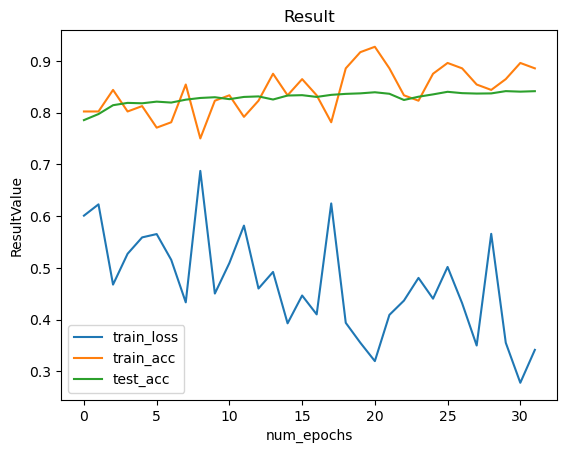

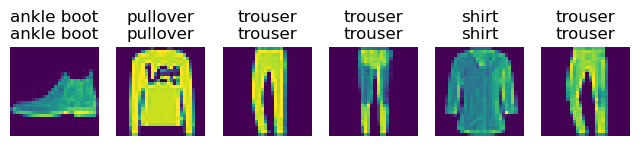

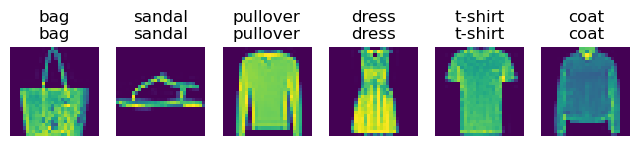

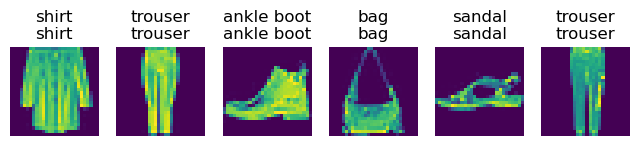

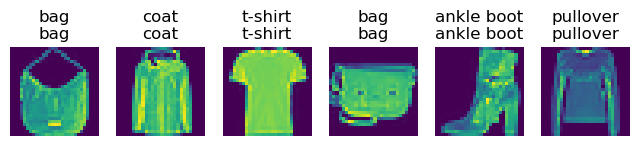

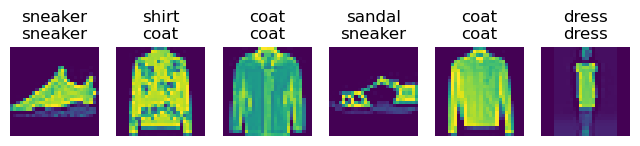

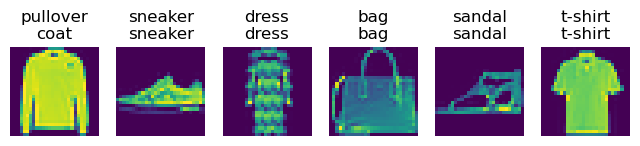

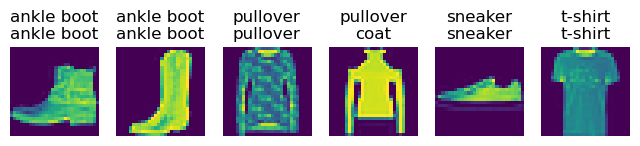

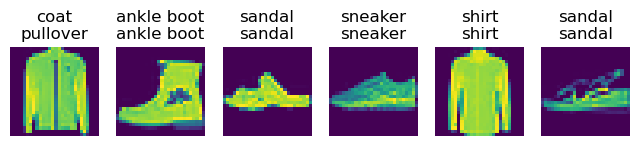

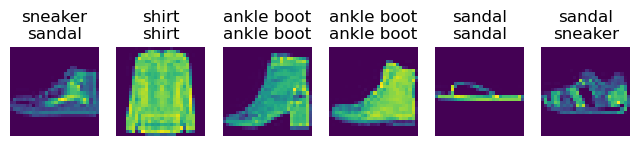

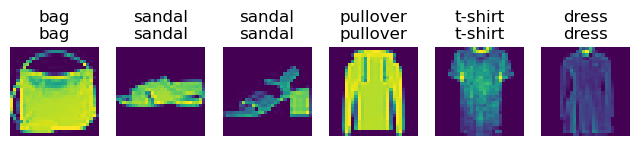

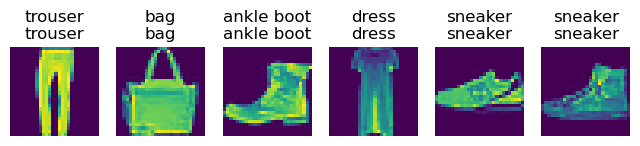

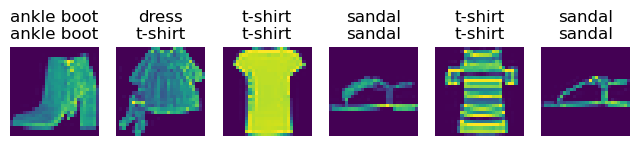

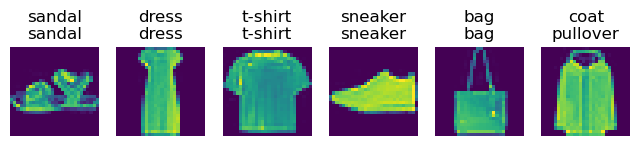

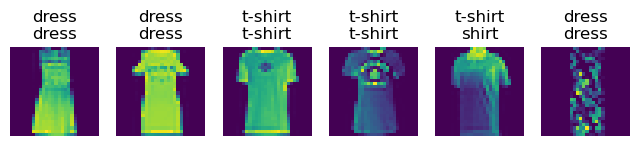

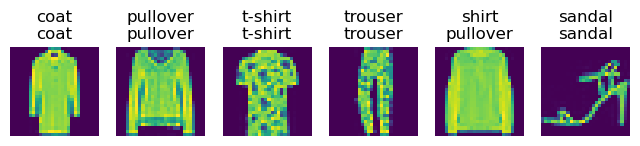

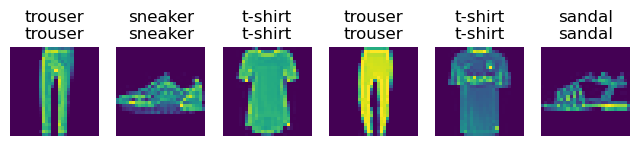

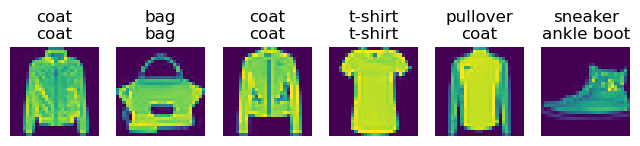

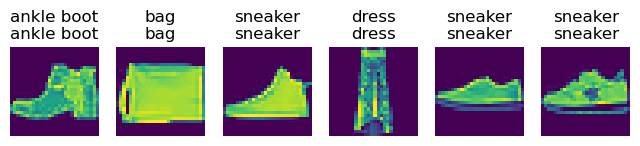

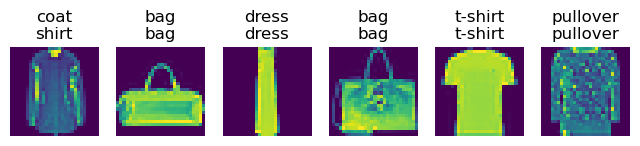

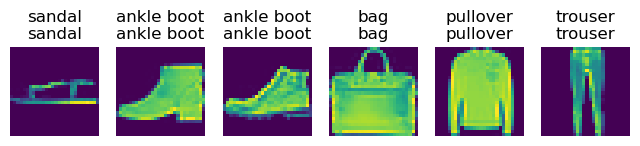

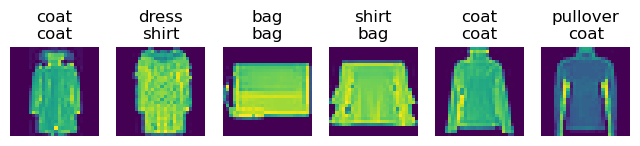

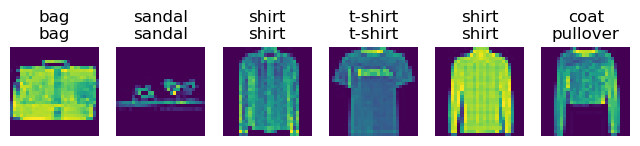

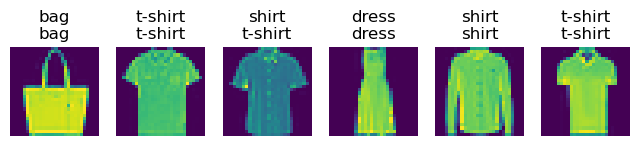

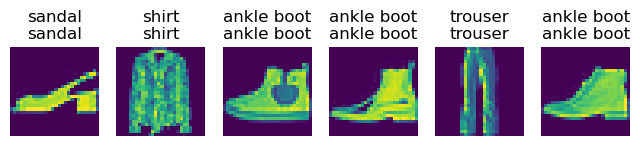

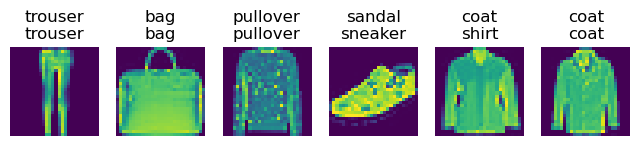

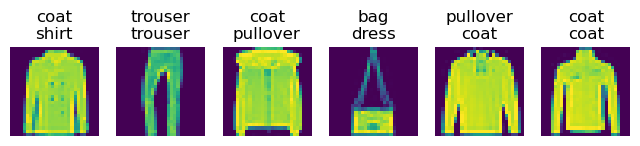

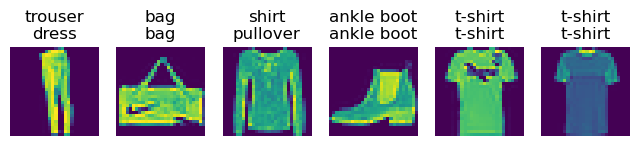

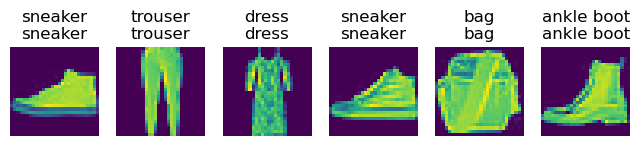

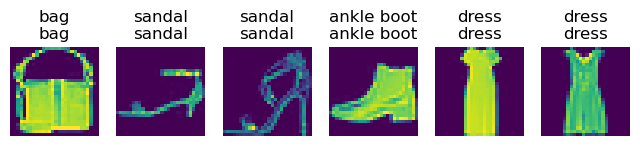

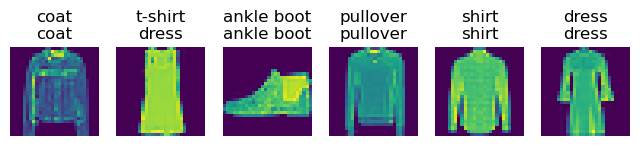

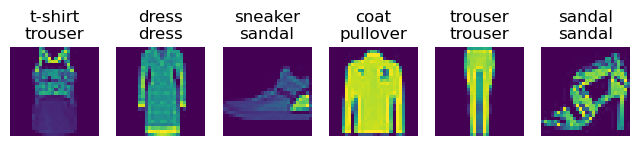

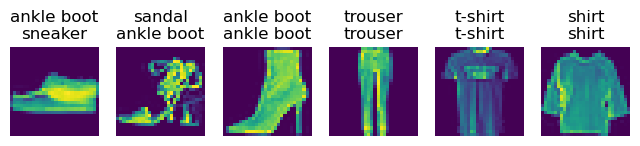

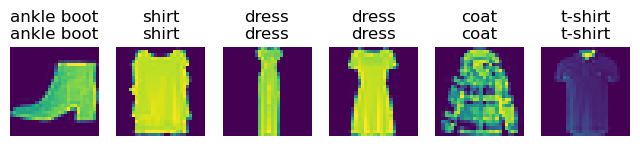

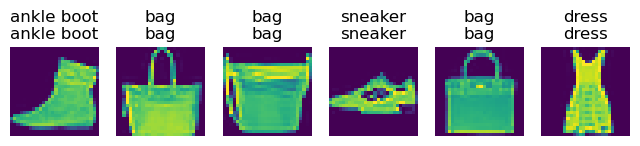

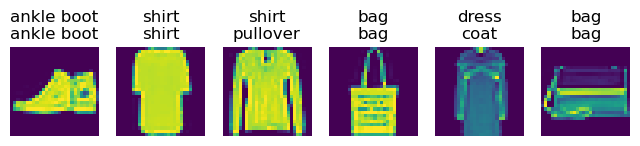

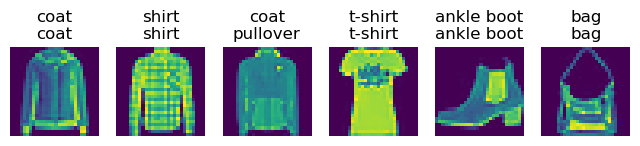

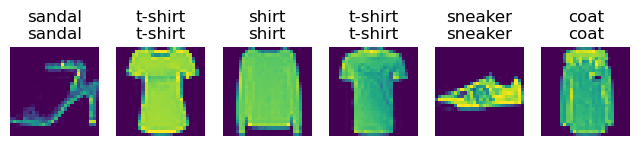

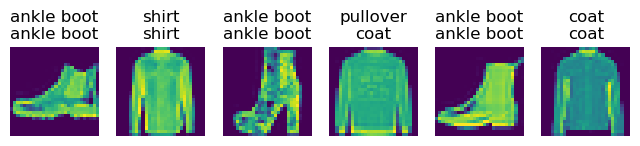

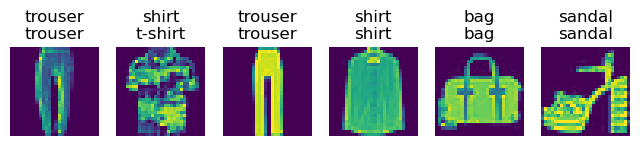

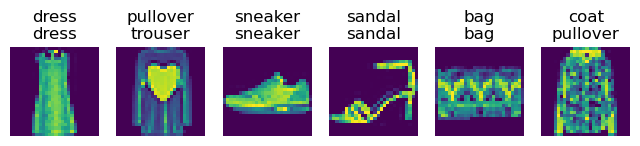

In [13]:
from st_train import *
batch_size = 256
num_epochs = 32
learning_rate = 0.07
train_set, test_set = (
            data.DataLoader(torchvision.datasets.FashionMNIST(root='./data', train=True,
                                                                        transform=transforms.ToTensor(),
                                                                        download=True),
                            num_workers=16, batch_size=batch_size, shuffle=True),
            data.DataLoader(torchvision.datasets.FashionMNIST(root='./data', train=False,
                                                                        transform=transforms.ToTensor(),
                                                                        download=True),
                            num_workers=16, batch_size=batch_size, shuffle=False))
def weight_init(m): # 初始化权重矩阵
    if isinstance(m,nn.Linear):
        return nn.init.normal_(m.weight,mean=0,std=0.01) # 这个函数将一个tensor用正态分布的值填满
"""
定义网络net:
Pytorch不会隐性地调整输入的形状,所以定义一个展平层Flatten()调整网络的输入形状
"""
net = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784,10)
)


net.apply(weight_init) # apply函数递归地把一个函数应用到每个子模块(这里是初始化权重函数)
loss_function = nn.CrossEntropyLoss(reduction='none')
updater = torch.optim.SGD(net.parameters(), lr=learning_rate)
Res = ResVisualization(('train_loss', 'train_acc', 'test_acc'), num_epochs)
train(net, train_set, test_set, loss_function, num_epochs, updater, Res)
Res.plot_res()
std_prediction(net, test_set, 6)